#### Disciplina: Aprendizagem de Máquina
#### Período: 2022.1
#### Professor: César Lincoln Cavalcante Mattos
#### Aluno: Ítalo Cavalcante de Abreu - 542406

# Lista 1 - Regressão linear, polinomial e regularização


Instruções
- Com exceção dos casos explicitamente indicados, os algoritmos e modelos devem
ser implementados do início em qualquer linguagem de programação (Python,
R, Octave...).
- Pacotes auxiliares (sklearn, matplotlib, etc) podem ser usados somente para
facilitar a manipulação dos dados e criar grácos.
- A entrega da solução pode ser feita via pdf ou Jupyter notebook pelo SIGAA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Questão 1

### Considere o conjunto de dados disponível em articial1d.csv organizado em duas colunas, x e y. Seja um modelo de regressão linear para yˆ = f(x).

In [65]:
dataset = np.genfromtxt('./artificial1d.csv', delimiter=',', skip_header=1)
dataset

array([[-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,  1.42295695],
       [ 1.        ,

In [70]:
x = dataset[:,0];
y = dataset[:,1];
X = np.array([np.full(x.size, 1),x]).T


    a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.

In [169]:
def MSE(X,N,w,y):
    #print(X[0, :])
    #print(w[:,:])
    
    y_pred =  np.dot(X,w)
    
    #(w[0] + w[1].T*x)
    return (1/(2*N))* np.sum( np.array(y - y_pred)**2 )

In [154]:

# y = X*w
def OLS(X,y):
    
    if(X.ndim <2):
        y_ = y.mean()
        x_ = X.mean()
        
        w1 = np.sum((y-y_)*(X-x_))/np.sum((X-x_)**2)
        w0 = y_- w1*x_
        
        return (w0,w1)
    else:
        XTX = np.dot(X.T,X)
        w = np.dot(np.dot(np.linalg.inv(XTX),X.T), y)
        # ou w = np.dot(np.linalg.pinv(X), y)
        return(w)

In [155]:
w = OLS(X, y)

y_pred = w[0] + w[1]*y
# Parametros encontrados
print('[w0 w1]: ', w)

# MSE
print('MSE: ', MSE(X,x.size,w,y) )

[w0 w1]:  [0.08956111 1.51328267]
MSE:  0.10385617947308844


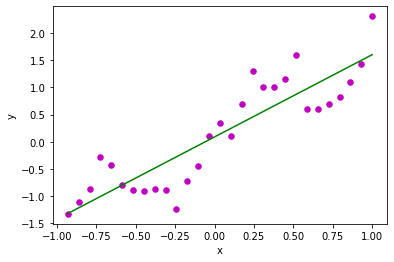

In [129]:
def plot2d(x, y, w):
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    y_pred = w[0] + w[1]*x
 
    plt.plot(x, y_pred, color = "g")
 
    plt.xlabel('x')
    plt.ylabel('y')
 
    plt.show()
    
plot2d(x,y,w)

    b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

In [79]:

def GD(X,y, alpha=0.01, epochs=100):
    N = X.shape[1]
    
    #Escolha um valor α positivo e pequeno.
    
    # Inicialize os parametros do modelo na iteracao t = 0.
    w = np.array(np.full(X.shape[1], 1))
    
    t=0

    print(w.shape, X.shape)
    
    # Repita por diversos ciclos ( ́epocas):
    stop_condition = False
    while not stop_condition:
        t=t+1
        
        w_t=w.copy()
        
        #print('w', w_t.shape)
        # Calcule os erros do modelo
        y_t = np.dot(X,w_t)
        
        #print('y',y_t.shape)
        
        
        err_t = (y - y_t)
        
        #print('e',err_t.shape)
        
        # Atualize os parametros
        w = w_t + alpha*(1/N)*np.dot(X.T, err_t)
        
        
        #print(err_t, '\n\n\n', X, '\n\n\n', np.dot(err_t,X), '\n\n\n', w)
        
        if t>=epochs:
            stop_condition = True
            
            


        
    #print('error :',err_t)
    return w
    
    
w2 = GD(X,y, 0.001, 10000)

(2,) (29, 2)


In [80]:
w2 = GD(X,y, 0.0001, 10000)
w2 = np.array(w2)


print('MSE: ', MSE(X,x.size, w2,y))


print('[w0 w1]: ', w2)

# MSE
print('MSE: ', MSE(X,x.size,w2,y)   )

(2,) (29, 2)
MSE:  0.10385956408116843
[w0 w1]:  [0.08979432 1.5087756 ]
MSE:  0.10385956408116843


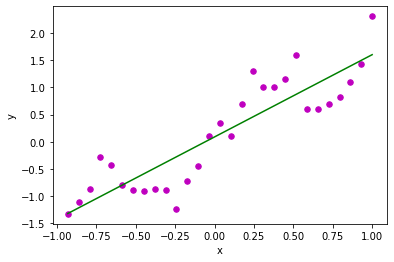

In [43]:
plot2d(x,y,w2)

    c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.


In [51]:
def SGD(X,y, alpha=0.01, epochs=100):
    N = X.shape[1]
    
    #Escolha um valor α positivo e pequeno.
    
    # Inicialize os parametros do modelo na iteracao t = 0.
    w = np.array(np.full(X.shape[1], 1))
    w[0] = 0
    t=0
    
    # Repita por diversos ciclos ( ́epocas):
    stop_condition = False
    while not stop_condition:
        
        t=t+1
        
        # Permute aleatoriamente a ordem dos dados
        # X_p = numpy.random.permutation(X).copy()
        assert X.shape[0] == y.size
        p = np.random.permutation(X.shape[0])
        X_p, y_p = X[p,:], y[p]

        
        # Para cada padr ̃ao de entrada, i = 1, . . . , N , repita:
        for i in range(0, N-1):

            w_t=w.copy()

            # Calcule os erros do modelo
            y_i_t = np.dot(X_p[i,:], w_t)
            err_t = y_p[i] - y_i_t

            # Atualize os parametros
            w = w_t + alpha*np.dot(err_t,X_p[i,:])


            #print(err_t, ' ', i, '\n\n\n', X_p, '\n\n\n', np.dot(err_t,X_p), '\n\n\n', w)
        
        if t>=epochs:
            stop_condition = True
        
    #print('error :',err_t)
    return w

In [52]:
w3 = SGD(X,y, 0.001, 10000)

y_pred3 = w3[0] + w3[1]*y
# Parametros encontrados
print('[w0 w1]: ', w3)

# MSE
print('MSE: ', MSE(X,x.size,w3,y)   )

[w0 w1]:  [0.08269171 1.49126427]
MSE:  0.10396598326731636


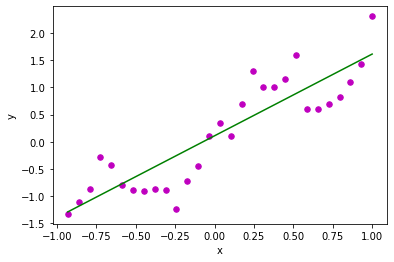

In [13]:
plot2d(x,y,w3)

## Questão 2
### Considere o conjunto de dados disponível em california.csv, organizado em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída. Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset.


In [99]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [100]:
california_dataset = np.genfromtxt('./california.csv', delimiter=',', skip_header=1)
print(california_dataset[0,:], '\n', california_dataset.shape)

[   2.8194       24.            4.7625        1.02083333  608.
    2.53333333   36.75       -119.85          0.811     ] 
 (4999, 9)


    a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%)

In [101]:
dataset_train, dataset_test = train_test_split(california_dataset, test_size=0.2, random_state=542406)

In [103]:
x_train = dataset_train[:,:8]
y_train = dataset_train[:,8]

#np.array([np.full(x.shape[0], 1), x[:,0], x[:,1], x[:,2], x[:,3], x[:,4], x[:,5], x[:,6], x[:,7]]).T

X_train = np.insert(x_train,0, np.full(x_train.shape[0], 1), axis=1)


x_test = dataset_test[:,:8]
y_test = dataset_test[:,8]

X_test = np.insert(x_test,0, np.full(x_test.shape[0], 1), axis=1)

print('training dataset: ', X_train, '\n', X_train.shape, '\n\n\n', 'testing dataset: ', X_test, X_test.shape, '\n')

training dataset:  [[   1.            3.65         10.         ...    3.54751943
    37.82       -121.28      ]
 [   1.            3.3929       39.         ...    3.46610169
    33.79       -118.27      ]
 [   1.            3.2622       33.         ...    2.83797217
    34.02       -118.09      ]
 ...
 [   1.            6.155        32.         ...    3.02325581
    34.25       -118.5       ]
 [   1.            2.02         22.         ...    3.16356877
    38.95       -119.95      ]
 [   1.            7.2758       52.         ...    2.65550239
    32.74       -117.22      ]] 
 (3999, 9) 


 testing dataset:  [[   1.            3.           50.         ...    3.
    33.98       -118.04      ]
 [   1.            3.6512       18.         ...    3.01097179
    34.04       -118.09      ]
 [   1.            3.2015       42.         ...    2.36462882
    34.16       -118.35      ]
 ...
 [   1.            2.5743        9.         ...    2.16103896
    34.59       -120.14      ]
 [   1.       

    b) Treine 11 modelos de regressão polinomial, com ordens de 1 a 11. Você pode usar o algoritmo OLS.


In [107]:
X_train_polinomial = X_train.copy()
for i in range (0, 10):
    for j in range (1, X_train.shape[1]):
        X_train_polinomial = np.insert(X_train_polinomial, X_train_polinomial.shape[1], (X_train_polinomial[:,j])**(i+2) , axis=1)

X_test_polinomial = X_test.copy()
for i in range (0, 10):
    for j in range (1, X_test.shape[1]):
        X_test_polinomial = np.insert(X_test_polinomial, X_test_polinomial.shape[1], (X_test_polinomial[:,j])**(i+2) , axis=1)

X_train_polinomial.shape

(3999, 89)

In [156]:
def Normalized(X):
    x_max = X.max(axis=0).T
    x_min = X.min(axis=0).T
    
    
    X_norm = X.copy()
    
    #print(x_max.shape, x_min.shape, X.shape[1])
    #return ( X_norm - x_min ) / ( x_max - x_min )
    
    for i in range(0, X.shape[1]):
        if(x_min[i][0] != x_max[i][0]):
            #print(x_min[i], x_max[i])
            X_norm[:, i] = (X_norm[:,i] - x_min[i])/(x_max[i] - x_min[i])
            
    return X_norm
    
    
    

In [157]:
X_train_polinomial[:, :9].max(axis=0)

array([ 1.00000000e+00,  1.50001000e+01,  5.20000000e+01,  5.62692308e+01,
        1.01538462e+01,  1.24270000e+04,  1.69375000e+01,  4.19500000e+01,
       -1.14570000e+02])

In [158]:
y_max = y_train.max()
y_min = y_train.min()

y_train_norm = (y_train - y_min)/(y_max - y_min)

In [159]:


X_train_polinomial_model1 = np.matrix(X_train_polinomial[:, :9]) 
X_train_polinomial_model2 = np.matrix(X_train_polinomial[:, :17]) 
X_train_polinomial_model3 = np.matrix(X_train_polinomial[:, :25]) 
X_train_polinomial_model4 = np.matrix(X_train_polinomial[:, :33]) 
X_train_polinomial_model5 = np.matrix(X_train_polinomial[:, :41]) 
X_train_polinomial_model6 = np.matrix(X_train_polinomial[:, :49]) 
X_train_polinomial_model7 = np.matrix(X_train_polinomial[:, :57]) 
X_train_polinomial_model8 = np.matrix(X_train_polinomial[:, :65]) 
X_train_polinomial_model9 = np.matrix(X_train_polinomial[:, :73]) 
X_train_polinomial_model10 = np.matrix(X_train_polinomial[:, :81]) 
X_train_polinomial_model11 = np.matrix(X_train_polinomial[:, :89]) 



X_train_polinomial_model11.shape

(3999, 89)

In [160]:

X_train_polinomial_norm_model1 = Normalized(X_train_polinomial_model1) 
X_train_polinomial_norm_model2 = Normalized(X_train_polinomial_model2) 
X_train_polinomial_norm_model3 = Normalized(X_train_polinomial_model3) 
X_train_polinomial_norm_model4 = Normalized(X_train_polinomial_model4) 
X_train_polinomial_norm_model5 = Normalized(X_train_polinomial_model5) 
X_train_polinomial_norm_model6 = Normalized(X_train_polinomial_model6) 
X_train_polinomial_norm_model7 = Normalized(X_train_polinomial_model7) 
X_train_polinomial_norm_model8 = Normalized(X_train_polinomial_model8) 
X_train_polinomial_norm_model9 = Normalized(X_train_polinomial_model9) 
X_train_polinomial_norm_model10 = Normalized(X_train_polinomial_model10) 
X_train_polinomial_norm_model11 = Normalized(X_train_polinomial_model11) 

X_train_polinomial_norm_model11[0,:]

matrix([[1.00000000e+00, 2.17245279e-01, 1.60000000e-01, 8.33003735e-02,
         7.00870615e-02, 4.77252597e-01, 1.47020000e-01, 5.61105207e-01,
         3.08247423e-01, 5.81642700e-02, 3.55555556e-02, 9.31400652e-03,
         9.55478933e-03, 2.28091048e-01, 3.87192730e-02, 5.29995468e-01,
         6.83092637e-01, 1.43712667e-02, 7.05547653e-03, 9.30973310e-04,
         1.08857005e-03, 1.08933956e-01, 8.79953921e-03, 4.98896453e-01,
         3.25647658e-01, 3.50463296e-03, 1.36550140e-03, 9.13548433e-05,
         1.17074479e-04, 5.20256721e-02, 1.89579197e-03, 4.68048505e-01,
         6.65538040e-01, 8.53046371e-04, 2.62932531e-04, 8.93792223e-06,
         1.23516905e-05, 2.48468950e-02, 4.00968100e-04, 4.37679845e-01,
         3.43343784e-01, 2.07581858e-04, 5.05768927e-05, 8.74044453e-07,
         1.29453000e-06, 1.18666067e-02, 8.42677863e-05, 4.08000285e-01,
         6.47713474e-01, 5.05115364e-05, 9.72682351e-06, 8.54666868e-08,
         1.35359611e-07, 5.66736227e-03, 1.76706275

In [161]:
w_Model_1 = OLS(X_train_polinomial_norm_model1, y_train_norm)
w_Model_2 = OLS(X_train_polinomial_norm_model2, y_train_norm)
w_Model_3 = OLS(X_train_polinomial_norm_model3, y_train_norm)
w_Model_4 = OLS(X_train_polinomial_norm_model4, y_train_norm)
w_Model_5 = OLS(X_train_polinomial_norm_model5, y_train_norm)
w_Model_6 = OLS(X_train_polinomial_norm_model6, y_train_norm)
w_Model_7 = OLS(X_train_polinomial_norm_model7, y_train_norm)
w_Model_8 = OLS(X_train_polinomial_norm_model8, y_train_norm)
w_Model_9 = OLS(X_train_polinomial_norm_model9, y_train_norm)
w_Model_10 = OLS(X_train_polinomial_norm_model10, y_train_norm)
w_Model_11 = OLS(X_train_polinomial_norm_model11, y_train_norm)



w_Model_1.T

matrix([[ 0.80859655],
        [ 1.2675767 ],
        [ 0.11641342],
        [-1.31315645],
        [ 1.57696572],
        [ 0.0491877 ],
        [-0.94494633],
        [-0.82808779],
        [-0.85015382]])

In [170]:
print('MSE Model1: ',MSE(X_train_polinomial_model1,X_train.shape[1],w_Model_1.T,y_train))
print('MSE Model2: ',MSE(X_train_polinomial_model2,X_train.shape[1],w_Model_2.T,y_train))
print('MSE Model3: ',MSE(X_train_polinomial_model3,X_train.shape[1],w_Model_3.T,y_train))
print('MSE Model4: ',MSE(X_train_polinomial_model4,X_train.shape[1],w_Model_4.T,y_train))
print('MSE Model5: ',MSE(X_train_polinomial_model5,X_train.shape[1],w_Model_5.T,y_train))
print('MSE Model6: ',MSE(X_train_polinomial_model6,X_train.shape[1],w_Model_6.T,y_train))
print('MSE Model7: ',MSE(X_train_polinomial_model7,X_train.shape[1],w_Model_7.T,y_train))
print('MSE Model8: ',MSE(X_train_polinomial_model8,X_train.shape[1],w_Model_8.T,y_train))
print('MSE Model9: ',MSE(X_train_polinomial_model9,X_train.shape[1],w_Model_9.T,y_train))
print('MSE Model10: ',MSE(X_train_polinomial_model10,X_train.shape[1],w_Model_10.T,y_train))
print('MSE Model11: ',MSE(X_train_polinomial_model11,X_train.shape[1],w_Model_11.T,y_train))

MSE Model1:  19697531756.604767
MSE Model2:  4.447694694083225e+18
MSE Model3:  1.0417387187997197e+27
MSE Model4:  7.778542400170433e+34
MSE Model5:  8.24331676240058e+45
MSE Model6:  8.188642119729575e+54
MSE Model7:  2.286990943984411e+64
MSE Model8:  1.1145410746678938e+72
MSE Model9:  3.1794874695918262e+81
MSE Model10:  7.135039126317047e+92
MSE Model11:  5.146025377767789e+102


In [26]:
def GD_L2(X,y, alpha=0.01, epochs=100, lambda_=0.001):
    N = X.shape[1]
    
    y_ = np.matrix(y).T
    #Escolha um valor α positivo e pequeno.
    
    # Inicialize os parametros do modelo na iteracao t = 0.
    w = np.matrix(np.full(N, 1)).T
    w[0] = 0
    t=0
    
    print(w.shape, X.shape)
    
    # Repita por diversos ciclos ( ́epocas):
    stop_condition = False
    while not stop_condition:
        t=t+1
        
        w_t=w.copy()
        
        #print('w', w_t.shape)
        # Calcule os erros do modelo
        y_t = np.dot(X, w_t)
        
        #print('y',y_t.shape)
        
        
        err_t = np.matrix(y_ - y_t)
        
        #print('e',err_t.shape)
        
        # Atualize os parametros
        w = w_t + alpha*( (1/N)*np.dot(X.T, err_t) - lambda_*w_t )
        
        
        #print(err_t, '\n\n\n', X, '\n\n\n', np.dot(err_t,X), '\n\n\n', w)
        
        if t>=epochs:
            stop_condition = True
        
    #print('error :',err_t)
    return w
    
    
w2 = GD(X,y, 0.001, 10000)

(2, 1) (29, 2)


In [171]:

# y = X*w
def OLS_L2(X,y, lambda_=0.001):
    
    if(X.ndim <2):
        y_ = y.mean()
        x_ = X.mean()
        
        w1 = np.sum((y-y_)*(X-x_))/np.sum((X-x_)**2)
        w0 = y_- w1*x_
        
        return (w0,w1)
    else:
        XTX = np.dot(X.T,X)
        w = np.dot(np.dot(np.linalg.inv(XTX - lambda_*np.identity(XTX.shape[1])),X.T), y)
        # ou w = np.dot(np.linalg.pinv(X), y)
        return(w)

In [173]:
w_Model_1 = OLS_L2(X_train_polinomial_norm_model1, y_train_norm)
w_Model_2 = OLS_L2(X_train_polinomial_norm_model2, y_train_norm)
w_Model_3 = OLS_L2(X_train_polinomial_norm_model3, y_train_norm)
w_Model_4 = OLS_L2(X_train_polinomial_norm_model4, y_train_norm)
w_Model_5 = OLS_L2(X_train_polinomial_norm_model5, y_train_norm)
w_Model_6 = OLS_L2(X_train_polinomial_norm_model6, y_train_norm)
w_Model_7 = OLS_L2(X_train_polinomial_norm_model7, y_train_norm)
w_Model_8 = OLS_L2(X_train_polinomial_norm_model8, y_train_norm)
w_Model_9 = OLS_L2(X_train_polinomial_norm_model9, y_train_norm)
w_Model_10 = OLS_L2(X_train_polinomial_norm_model10, y_train_norm)
w_Model_11 = OLS_L2(X_train_polinomial_norm_model11, y_train_norm)

In [174]:
print('MSE Model1: ',MSE(X_train_polinomial_model1,X_train.shape[1],w_Model_1.T,y_train))
print('MSE Model2: ',MSE(X_train_polinomial_model2,X_train.shape[1],w_Model_2.T,y_train))
print('MSE Model3: ',MSE(X_train_polinomial_model3,X_train.shape[1],w_Model_3.T,y_train))
print('MSE Model4: ',MSE(X_train_polinomial_model4,X_train.shape[1],w_Model_4.T,y_train))
print('MSE Model5: ',MSE(X_train_polinomial_model5,X_train.shape[1],w_Model_5.T,y_train))
print('MSE Model6: ',MSE(X_train_polinomial_model6,X_train.shape[1],w_Model_6.T,y_train))
print('MSE Model7: ',MSE(X_train_polinomial_model7,X_train.shape[1],w_Model_7.T,y_train))
print('MSE Model8: ',MSE(X_train_polinomial_model8,X_train.shape[1],w_Model_8.T,y_train))
print('MSE Model9: ',MSE(X_train_polinomial_model9,X_train.shape[1],w_Model_9.T,y_train))
print('MSE Model10: ',MSE(X_train_polinomial_model10,X_train.shape[1],w_Model_10.T,y_train))
print('MSE Model11: ',MSE(X_train_polinomial_model11,X_train.shape[1],w_Model_11.T,y_train))

MSE Model1:  19683060583.62277
MSE Model2:  4.5239568665403924e+18
MSE Model3:  2.880841247010378e+26
MSE Model4:  7.52084939264551e+36
MSE Model5:  9.424673528460534e+43
MSE Model6:  1.5433389639390819e+52
MSE Model7:  5.357872364507656e+61
MSE Model8:  2.897191285889747e+72
MSE Model9:  1.2939872332744101e+78
MSE Model10:  6.569556280199537e+85
MSE Model11:  1.864733277836249e+94


    Não deu muito certo então resolvi trabalhar com menos atributos

In [183]:

c = 1
X_train_polinomial = X_train[:, :(c+2)].copy()

X_train_polinomial = np.delete(X_train_polinomial, 2, axis=1)

N = X_train_polinomial.shape[1]


for i in range (0, 10):
    for j in range (1, N):
        X_train_polinomial = np.insert(X_train_polinomial, X_train_polinomial.shape[1], (X_train_polinomial[:,j])**(i+2) , axis=1)


        
X_test_polinomial = X_test[:, :(c+2)].copy()

X_test_polinomial = np.delete(X_test_polinomial, 2, axis=1)

N = X_test_polinomial.shape[1]


for i in range (0, 10):
    for j in range (1, N):
        X_test_polinomial = np.insert(X_test_polinomial, X_test_polinomial.shape[1], (X_test_polinomial[:,j])**(i+2) , axis=1)

X_test_polinomial.shape


(1000, 12)

In [233]:

i=1
X_train_polinomial_model1 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1
X_train_polinomial_model2 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1
X_train_polinomial_model3 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1
X_train_polinomial_model4 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1
X_train_polinomial_model5 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1
X_train_polinomial_model6 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1
X_train_polinomial_model7 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1
X_train_polinomial_model8 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1
X_train_polinomial_model9 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1
X_train_polinomial_model10 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1
X_train_polinomial_model11 = np.matrix(X_train_polinomial[:, :(1+i*c)])
i=i+1


X_train_polinomial_norm_model1 = Normalized(X_train_polinomial_model1) 
X_train_polinomial_norm_model2 = Normalized(X_train_polinomial_model2) 
X_train_polinomial_norm_model3 = Normalized(X_train_polinomial_model3) 
X_train_polinomial_norm_model4 = Normalized(X_train_polinomial_model4) 
X_train_polinomial_norm_model5 = Normalized(X_train_polinomial_model5) 
X_train_polinomial_norm_model6 = Normalized(X_train_polinomial_model6) 
X_train_polinomial_norm_model7 = Normalized(X_train_polinomial_model7) 
X_train_polinomial_norm_model8 = Normalized(X_train_polinomial_model8) 
X_train_polinomial_norm_model9 = Normalized(X_train_polinomial_model9) 
X_train_polinomial_norm_model10 = Normalized(X_train_polinomial_model10) 
X_train_polinomial_norm_model11 = Normalized(X_train_polinomial_model11) 

a = X_train_polinomial_norm_model1[:,1].T.tolist()[0]
a

[0.2172452793754569,
 0.19951448945531786,
 0.19050082067833546,
 0.2823340367719066,
 0.2966579771313499,
 0.11699838622915547,
 0.1719631453359264,
 0.17924580350615854,
 0.17976303775120345,
 0.16690804264768766,
 0.24904484076081712,
 0.3351057226796872,
 0.28108577812719826,
 0.3466159087460863,
 0.1347429690624957,
 0.48740707024730695,
 0.23388642915270136,
 0.38256024054840626,
 0.20183169887311897,
 0.10345374546557978,
 0.15887367070799024,
 0.15862539827036867,
 0.3410090895297996,
 0.25569302492379414,
 0.35065723231403706,
 0.09164701176535496,
 0.43853877877546515,
 0.1004124081047158,
 0.2551551013089475,
 0.1982800237238107,
 0.21743838016027364,
 0.4228976152053075,
 0.28279609936414674,
 0.268410090895298,
 0.3646294533868498,
 0.257327485138136,
 0.05836471221086606,
 0.16102536516737703,
 0.2332726445152481,
 0.1640735989848416,
 0.13655673714845312,
 0.21228672707962648,
 0.12317761134329182,
 0.12931545771782457,
 0.2300037240865643,
 0.3250437924994138,
 0.658487

In [305]:
w_Model_1 = OLS(X_train_polinomial_model1, y_train)
w_Model_2 = OLS(X_train_polinomial_norm_model2, y_train_norm)
w_Model_3 = OLS(X_train_polinomial_norm_model3, y_train_norm)
w_Model_4 = OLS(X_train_polinomial_norm_model4, y_train_norm)
w_Model_5 = OLS(X_train_polinomial_norm_model5, y_train_norm)
w_Model_6 = OLS(X_train_polinomial_norm_model6, y_train_norm)
w_Model_7 = OLS(X_train_polinomial_norm_model7, y_train_norm)
w_Model_8 = OLS(X_train_polinomial_norm_model8, y_train_norm)
w_Model_9 = OLS(X_train_polinomial_norm_model9, y_train_norm)
w_Model_10 = OLS(X_train_polinomial_norm_model10, y_train_norm)
w_Model_11 = OLS(X_train_polinomial_norm_model11, y_train_norm)



In [306]:
print('MSE Model1: ',MSE(X_train_polinomial_model1,X_train.shape[1],w_Model_1.T,y_train))
print('MSE Model2: ',MSE(X_train_polinomial_model2,X_train.shape[1],w_Model_2.T,y_train))
print('MSE Model3: ',MSE(X_train_polinomial_model3,X_train.shape[1],w_Model_3.T,y_train))
print('MSE Model4: ',MSE(X_train_polinomial_model4,X_train.shape[1],w_Model_4.T,y_train))
print('MSE Model5: ',MSE(X_train_polinomial_model5,X_train.shape[1],w_Model_5.T,y_train))
print('MSE Model6: ',MSE(X_train_polinomial_model6,X_train.shape[1],w_Model_6.T,y_train))
print('MSE Model7: ',MSE(X_train_polinomial_model7,X_train.shape[1],w_Model_7.T,y_train))
print('MSE Model8: ',MSE(X_train_polinomial_model8,X_train.shape[1],w_Model_8.T,y_train))
print('MSE Model9: ',MSE(X_train_polinomial_model9,X_train.shape[1],w_Model_9.T,y_train))
print('MSE Model10: ',MSE(X_train_polinomial_model10,X_train.shape[1],w_Model_10.T,y_train))
print('MSE Model11: ',MSE(X_train_polinomial_model11,X_train.shape[1],w_Model_11.T,y_train))

MSE Model1:  1676085.5775448056
MSE Model2:  36456412.65951706
MSE Model3:  274608838059.68634
MSE Model4:  4801738443146.6045
MSE Model5:  2.334814592819434e+16
MSE Model6:  9.751903483293278e+20
MSE Model7:  3.289604732127461e+24
MSE Model8:  7.801551064475294e+26
MSE Model9:  6.517246551857965e+29
MSE Model10:  4.880993867756908e+33
MSE Model11:  1.845494119748525e+36


In [307]:

i=1
X_test_polinomial_model1 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1
X_test_polinomial_model2 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1
X_test_polinomial_model3 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1
X_test_polinomial_model4 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1
X_test_polinomial_model5 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1
X_test_polinomial_model6 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1
X_test_polinomial_model7 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1
X_test_polinomial_model8 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1
X_test_polinomial_model9 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1
X_test_polinomial_model10 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1
X_test_polinomial_model11 = np.matrix(X_test_polinomial[:, :(1+i*c)])
i=i+1


X_test_polinomial_norm_model1 = Normalized(X_test_polinomial_model1) 
X_test_polinomial_norm_model2 = Normalized(X_test_polinomial_model2) 
X_test_polinomial_norm_model3 = Normalized(X_test_polinomial_model3) 
X_test_polinomial_norm_model4 = Normalized(X_test_polinomial_model4) 
X_test_polinomial_norm_model5 = Normalized(X_test_polinomial_model5) 
X_test_polinomial_norm_model6 = Normalized(X_test_polinomial_model6) 
X_test_polinomial_norm_model7 = Normalized(X_test_polinomial_model7) 
X_test_polinomial_norm_model8 = Normalized(X_test_polinomial_model8) 
X_test_polinomial_norm_model9 = Normalized(X_test_polinomial_model9) 
X_test_polinomial_norm_model10 = Normalized(X_test_polinomial_model10) 
X_test_polinomial_norm_model11 = Normalized(X_test_polinomial_model11) 

a = X_test_polinomial_norm_model1[:,1].T.tolist()[0]
a

[0.16957773379652055,
 0.21464160657688952,
 0.1835217914827066,
 0.27901955628140007,
 0.14719112009189927,
 0.2314090764397326,
 0.48738460686753493,
 0.17390281372399763,
 0.11607822512560033,
 0.30896986976319324,
 0.29933013162083233,
 0.2387790126361535,
 0.2670477350421436,
 0.893838318132119,
 0.18168795759345632,
 0.11468035929303974,
 0.716627683279587,
 0.27613386295378733,
 0.08282009051527273,
 0.40302824796202236,
 0.21787330629870041,
 0.3104507771303614,
 0.4204046890786542,
 0.18831744010629314,
 0.15890689659944915,
 0.17390281372399763,
 0.17029742709645276,
 0.20899478222357548,
 0.24329093601649757,
 0.22831577927560104,
 0.1573913885928612,
 0.2403498816658132,
 0.1455510497834,
 0.10902661481184171,
 0.2779953773545735,
 0.2666948085200615,
 0.2379139966506581,
 0.3489474485488492,
 0.3435359085435899,
 0.17721063485253208,
 0.21872448202842787,
 0.2680926743526221,
 0.07868185404066268,
 0.155163107414225,
 0.10859064675515204,
 0.07509030766888573,
 0.245083249

In [308]:
print('MSE Model1: ',MSE(X_test_polinomial_model1,X_test.shape[1],w_Model_1.T,y_test))
print('MSE Model2: ',MSE(X_test_polinomial_model2,X_test.shape[1],w_Model_2.T,y_test))
print('MSE Model3: ',MSE(X_test_polinomial_model3,X_test.shape[1],w_Model_3.T,y_test))
print('MSE Model4: ',MSE(X_test_polinomial_model4,X_test.shape[1],w_Model_4.T,y_test))
print('MSE Model5: ',MSE(X_test_polinomial_model5,X_test.shape[1],w_Model_5.T,y_test))
print('MSE Model6: ',MSE(X_test_polinomial_model6,X_test.shape[1],w_Model_6.T,y_test))
print('MSE Model7: ',MSE(X_test_polinomial_model7,X_test.shape[1],w_Model_7.T,y_test))
print('MSE Model8: ',MSE(X_test_polinomial_model8,X_test.shape[1],w_Model_8.T,y_test))
print('MSE Model9: ',MSE(X_test_polinomial_model9,X_test.shape[1],w_Model_9.T,y_test))
print('MSE Model10: ',MSE(X_test_polinomial_model10,X_test.shape[1],w_Model_10.T,y_test))
print('MSE Model11: ',MSE(X_test_polinomial_model11,X_test.shape[1],w_Model_11.T,y_test))

MSE Model1:  106946.20167757248
MSE Model2:  2140062.7627068344
MSE Model3:  15757431770.092037
MSE Model4:  277068355402.8224
MSE Model5:  1385722025068443.2
MSE Model6:  6.019078751483823e+19
MSE Model7:  2.10430383018369e+23
MSE Model8:  5.138956275076301e+25
MSE Model9:  4.3825187329891695e+28
MSE Model10:  3.334475050489776e+32
MSE Model11:  1.2765002583923258e+35


(1, 3999) (2, 3999)


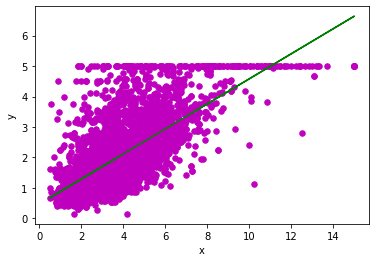

(1, 3999) (3, 3999)


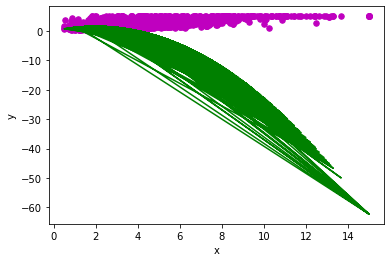

(1, 3999) (5, 3999)


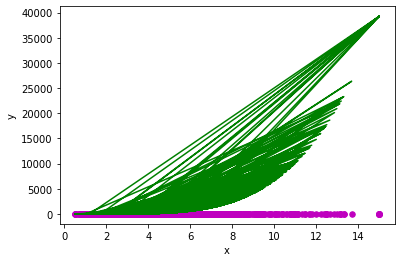

(1, 3999) (6, 3999)


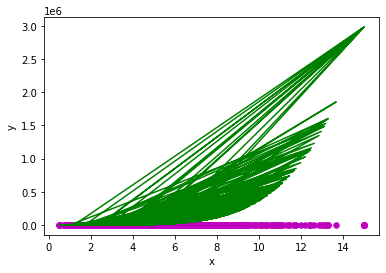

(1, 3999) (7, 3999)


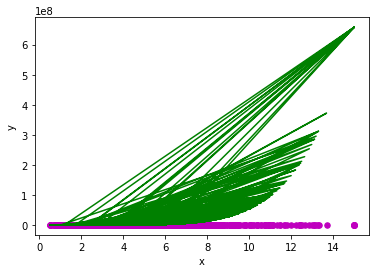

(1, 3999) (8, 3999)


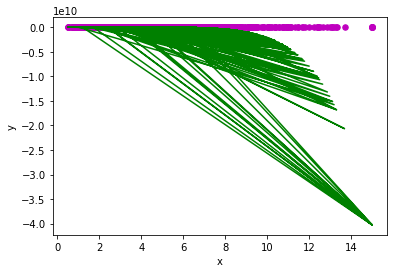

(1, 3999) (9, 3999)


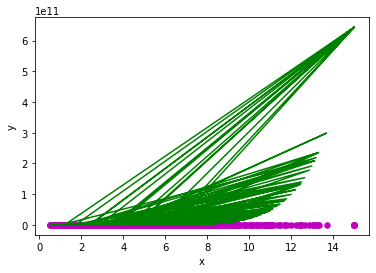

(1, 3999) (10, 3999)


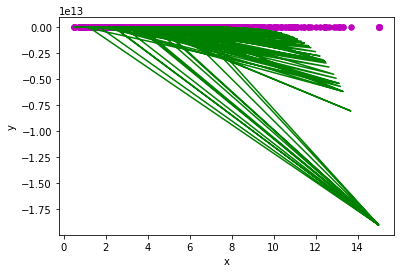

(1, 3999) (11, 3999)


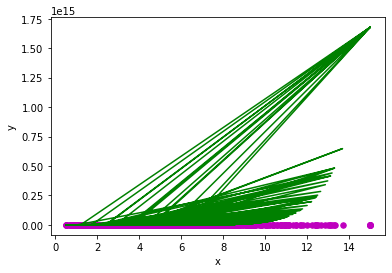

(1, 3999) (12, 3999)


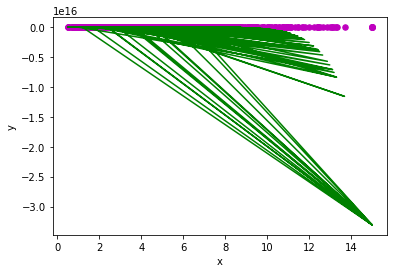

In [333]:
def plotModel(x, y, w):
    plt.scatter(np.array(x[:,1].T.tolist()[0]), y, color = "m", marker = "o", s = 30)
    

    y_pred = np.dot(w,x.T)
    print(y_pred.shape, x.T.shape)
    plt.plot(x[:,1].T.tolist()[0], y_pred.tolist()[0], color = "g")
 
    plt.xlabel('x')
    plt.ylabel('y')
 
    plt.show()
    
plotModel(X_train_polinomial_model1,y_train,w_Model_1)
plotModel(X_train_polinomial_model2,y_train,w_Model_2)
plotModel(X_train_polinomial_model4,y_train,w_Model_4)
plotModel(X_train_polinomial_model5,y_train,w_Model_5)
plotModel(X_train_polinomial_model6,y_train,w_Model_6)
plotModel(X_train_polinomial_model7,y_train,w_Model_7)
plotModel(X_train_polinomial_model8,y_train,w_Model_8)
plotModel(X_train_polinomial_model9,y_train,w_Model_9)
plotModel(X_train_polinomial_model10,y_train,w_Model_10)
plotModel(X_train_polinomial_model11,y_train,w_Model_11)

Contonuou muito ruim... => Cometi algum erro bem grave mas não consegui encontrar